# Logistic Regression- Classification problem with synthetic data

In [34]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt

### Assigning mean,no of samples, and dataset

In [35]:
mu1 = [4,2]
mu2 = [2,4]
m1=100
m2=100
cov = np.identity(2)
X1 = np.random.multivariate_normal(mu1, cov, m1)
X2 = np.random.multivariate_normal(mu2, cov, m2)

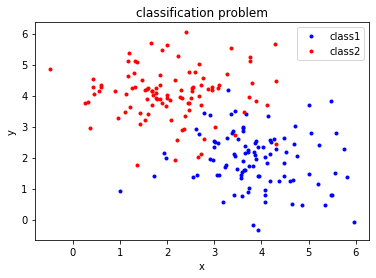

In [36]:
plt.plot(X1[:,0],X1[:,1],'b.',label='class1')
plt.plot(X2[:,0],X2[:,1],'r.',label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('classification problem')
plt.show()

In [37]:
X1.shape

(100, 2)

### Plotting the classification dataset

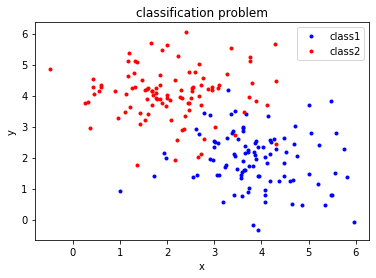

In [38]:
plt.plot(X1[:,0],X1[:,1],'b.',label='class1')
plt.plot(X2[:,0],X2[:,1],'r.',label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('classification problem')
plt.show()

### Writing the required functions

In [39]:
def sigmoid(theta,X):
    return (1/(1+np.exp(-theta.T*X)))

def loglike(theta,X,y):
    h = sigmoid(theta,X)
    return np.sum(np.multiply(y,np.log(h))+np.multiply((1-y),np.log(1-h)))

def h(theta,X):
    return sigmoid(theta,X)

m=m1+m2

X= np.concatenate([X1,X2],0)
X = np.concatenate([np.ones([m,1]),X],1).T
theta = np.matrix([0.1,0.1,0.1]).T
print(theta.shape)
y = np.concatenate([np.zeros([m1,1]), np.ones([m2,1])],0)
x_concatenated = np.matrix(X)
y_mat = np.matrix(y)

(3, 1)


In [40]:
alpha =0.00001

def gradient(theta,X,y):
    return (-h(theta,X)+y.T).dot(X.T)

def gradient_ascent_1(alpha,theta,X,y):
    j_iter=[]
    theta_iter = [[],[]]
    go = 1
    i = 1
    j_iter.append(loglike(theta,X,y.T))
    print(j_iter[0])
    while go:
        theta = theta + alpha *(gradient(theta,X,y).T)
        j_iter.append(loglike(theta,X,y.T))
        if abs(j_iter[i]-j_iter[i-1])<0.0001:
            go = 0
        else:
            go = 1
            i=i+1
        theta_iter = np.append(theta_iter, theta)
    return theta,j_iter,theta_iter,i


theta_opt,j_iter,theta_iter,counter = gradient_ascent_1(alpha,theta,x_concatenated,y_mat)

-149.304293293018


In [41]:
theta

matrix([[0.1],
        [0.1],
        [0.1]])

## Plotting the loglikelihood function

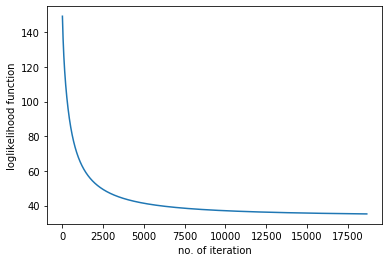

In [42]:
j_iter1=np.array([j_iter])
plt.plot(abs(j_iter1).T)
plt.xlabel('no. of iteration')
plt.ylabel('loglikelihood function')
plt.show()

## printing the no. of iteration where it converges

In [43]:
print('optimal iteration no',counter)
print('converging likelihood',j_iter[-1])

optimal iteration no 18666
converging likelihood -35.14475108839983


In [44]:
print('theta optimal',theta_opt.T)

theta optimal [[-0.13061102 -1.8036754   1.85948422]]


In [45]:
## checking minimum value of one feature
print(min(X1[:,0]))

1.0089247704500406


In [46]:
# to make the boundary line start from 0
plot_x = np.array([min(X1[:,0]-2), max(X1[:,0])])
plot_x = np.matrix(plot_x)
print(plot_x)
plot_y = (-1/theta_opt[2]) * (theta_opt[1] * plot_x + theta_opt[0])
print(plot_y)

[[-0.99107523  5.96237092]]
[[-0.89108958  5.85366238]]


In [47]:
plot_y_prev = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

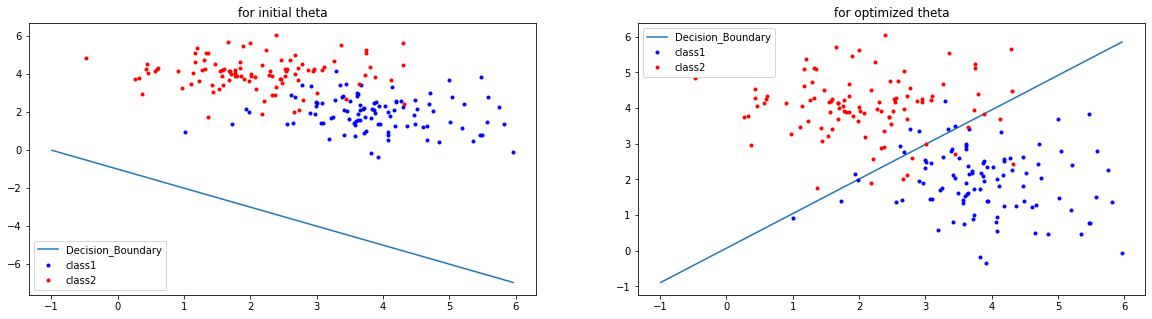

In [48]:
fig,ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt2 = plt.subplot(1,2,1)
plt1 = plt.subplot(1,2,2)

plt1.plot(plot_x.T, plot_y.T, label = "Decision_Boundary")
plt1.plot(X1[:,0],X1[:,1],'b.',label='class1')
plt1.plot(X2[:,0],X2[:,1],'r.',label='class2')
plt1.set_title('for optimized theta')
plt1.legend()

plt2.plot(plot_x.T, plot_y_prev.T, label = "Decision_Boundary")
plt2.plot(X1[:,0],X1[:,1],'b.',label='class1')
plt2.plot(X2[:,0],X2[:,1],'r.',label='class2')
plt2.set_title('for initial theta')
plt2.legend()

plt.show()

## Calculation of Accuracy

In [49]:
X_mean=np.array([np.mean(X,axis=1)])
X_std=np.array([np.std(X,axis=1)])

In [50]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

def classifierPredict(theta,X):    
    predictions = sigmoid(X.dot(theta))    
    return predictions>0.5

def accuracy(X,theta):
    print(' ')
    print('Theta=',theta.T)
    size=X.shape[0]
    p=classifierPredict(theta,X)
    return (sum(p==y)/size*100)[0,0]

print("Accuracy with non optimized Theta:",accuracy(X.T,theta),'%',)
print("Accuracy with optimized Theta:",accuracy(X.T,theta_opt),'%')

 
Theta= [[0.1 0.1 0.1]]
Accuracy with non optimized Theta: 50.0 %
 
Theta= [[-0.13061102 -1.8036754   1.85948422]]
Accuracy with optimized Theta: 91.5 %


In [51]:
y_mat.shape

(200, 1)